### [사전이해: openCV 동영상]
- fps: 1초를 구성하는 이미지의 갯수
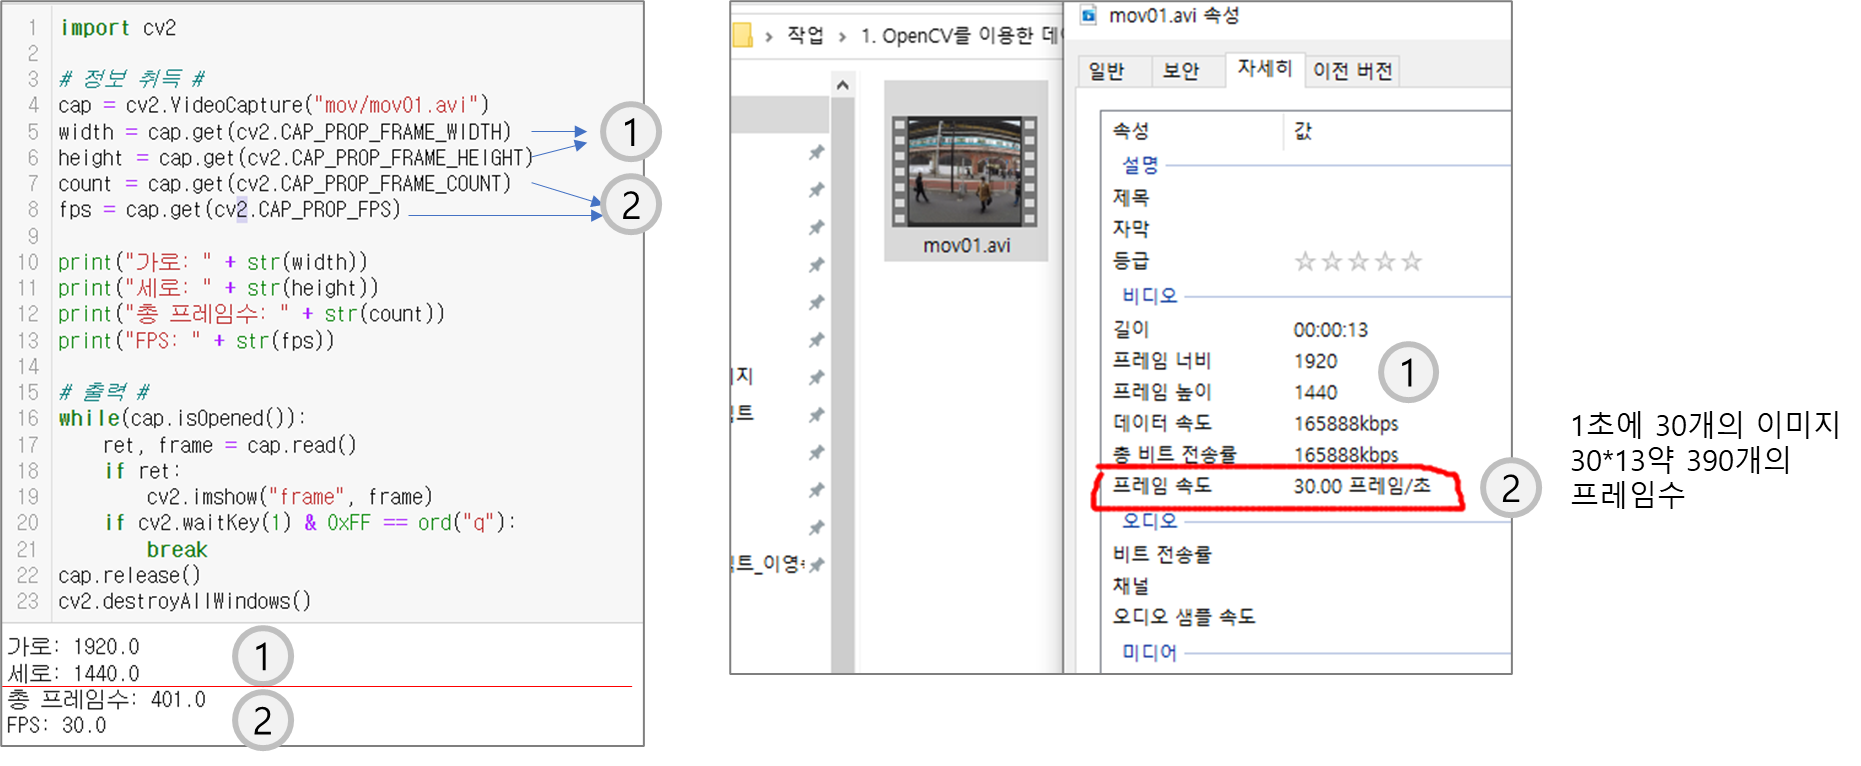

#### [실행1] 비디오 플레이

In [5]:
import cv2
cap = cv2.VideoCapture("mov01.avi")

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        cv2.imshow("frame", frame)
        
    if cv2.waitKey(10) == 27:                   # esc키를 누르면 중지
            break
    
cap.release()
cv2.destroyAllWindows()

#### [실행2] 플레이되는 비디오 우측에 fps 출력

In [10]:
## 비디오 플레이 하면 화면 우측 끝에 숫자값 fps가 계속 변경됨
import cv2
cap = cv2.VideoCapture("mov01.avi")
org=(int(cap.get(3))-800,200)     # cap.get(3)은 비디오의 너비를 의미함.
font=cv2.FONT_HERSHEY_SIMPLEX

num=0
while(cap.isOpened()):
    ret, frame = cap.read()
    num+=1; text='fps:'+ str(num) 
    
    if ret:
        frame = cv2.cvtColor(frame, cv2.IMREAD_COLOR)
        frame=cv2.resize(frame, (600,400))  ## resize
        cv2.putText(frame,text,org,font,3,(255,255,255),7)
        cv2.imshow("frame", frame)
        
    #cv2.waitKey(int(1000/fps))        # 이작업도 동일함
    if cv2.waitKey(10) == 27:                   # esc키를 누르면 중지
            break
    cv2.waitKey(fps)
cap.release()
cv2.destroyAllWindows()

TypeError: Argument 'delay' is required to be an integer

### [미션1]: 비디오에서 사람객체에 박스 그리기
- 참고: 박스색상을 랜덤하게 그리고자 한다면
    - c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
- 작업: 실행2 코드를 이용하고 '1. 오픈CV를 이용한 사람영역검출.ipynb' 코드를 이용하여서  비디오에 사람영역을 검출합니다.
- 작업: 각 사람영역의 인원수만큼  cnt 우측에 출력함
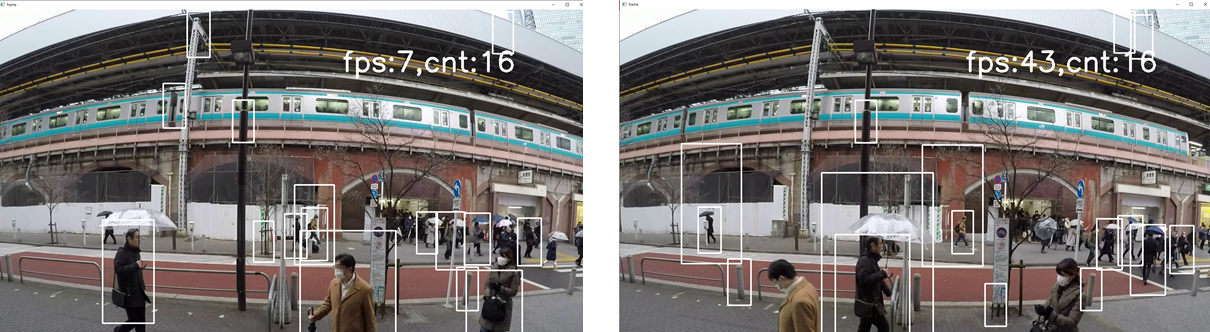

In [7]:
import cv2
cap = cv2.VideoCapture("mov01.avi")
  
# 보행자 검출을 위한 HOG 기술 설정
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

org=(int(cap.get(3))-800,200)     # cap.get(3)은 비디오의 너비를 의미함.
fps=cap.get(4)
font=cv2.FONT_HERSHEY_SIMPLEX



num=0
while True:
    ret, frame = cap.read()
    
    
    if ret:       
       
        human, r = hog.detectMultiScale(frame)  # 사각형정보를 받아옴
        num+=1; text='fps:'+ str(num)  + ',cnt:' + str(len(human))
       
        
        for (x, y, w, h) in human:
            cv2.rectangle(frame, (x, y, w, h), (255,255,255), 3)
            
        cv2.putText(frame,text,org,font,3,(255,255,255),7)
        cv2.imshow('frame',frame)
       
        
    if cv2.waitKey(int(1000/fps)) == 27:
        break
cap.release()
cv2.destroyAllWindows()


### [미션2]: fps별 인원수 변동사항확인
- data 변수에 저장함
    - 저장형식==> [[frame,인원수], [frame,인원수]...]

In [75]:
import cv2
cap = cv2.VideoCapture("mov/mov01.avi")
  
# 보행자 검출을 위한 HOG 기술 설정
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

org=(int(cap.get(3))-800,200)     # cap.get(3)은 비디오의 너비를 의미함.
fps=cap.get(4)
font=cv2.FONT_HERSHEY_SIMPLEX



num=0; data=[]
while True:
    ret, frame = cap.read()
    
    
    if ret:       
               
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        human, r = hog.detectMultiScale(gray)  # 사각형정보를 받아옴
        
        num+=1; text='fps:'+ str(num)  + ',cnt:' + str(len(human))
        data.append([])
        data[-1].append(num)
        data[-1].append(len(human))
        
        if (len(human)>0):
            for (x, y, w, h) in human:
                cv2.rectangle(frame, (x, y, w, h), (255,255,255), 3)

            cv2.putText(frame,text,org,font,3,(255,255,255),7)
        cv2.imshow('frame',frame)
       
        
    if cv2.waitKey(10) == 27:
        break
cap.release()
cv2.destroyAllWindows()


### [작업]: 위의 작업이 종료되었다면 data를 이용하여 인구변동수 차트를 제작합니다.

In [82]:
## sample로 10개 출력, 현재 ,하단의 data 자료는 200 프레임에서 중단한 자료임
data[:10]

array([[ 1, 10],
       [ 2, 12],
       [ 3, 14],
       [ 4, 16],
       [ 5, 17],
       [ 6, 18],
       [ 7, 17],
       [ 8, 17],
       [ 9, 15],
       [10, 14]])

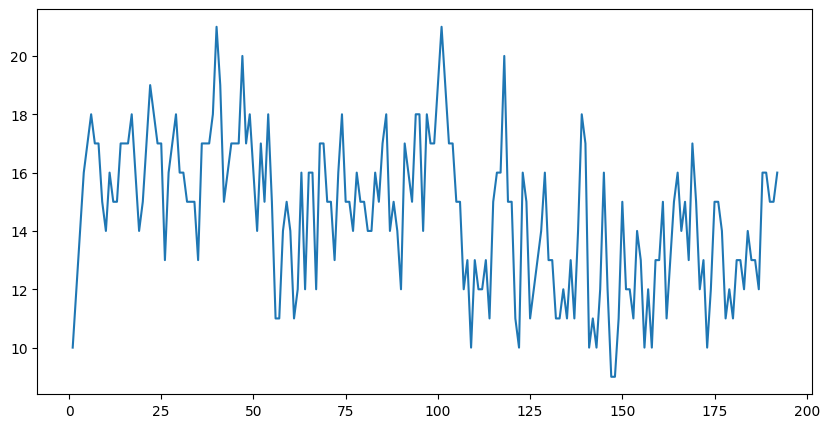

In [87]:
import numpy as np
import matplotlib.pyplot as plt
data=np.array(data)
x=data[:,0]; y=data[:,1]
plt.figure(figsize=(10,5))
plt.plot(x,y)

### ▶참고: 이동평균선을 이용한 노이즈 제거
- https://wikidocs.net/4373
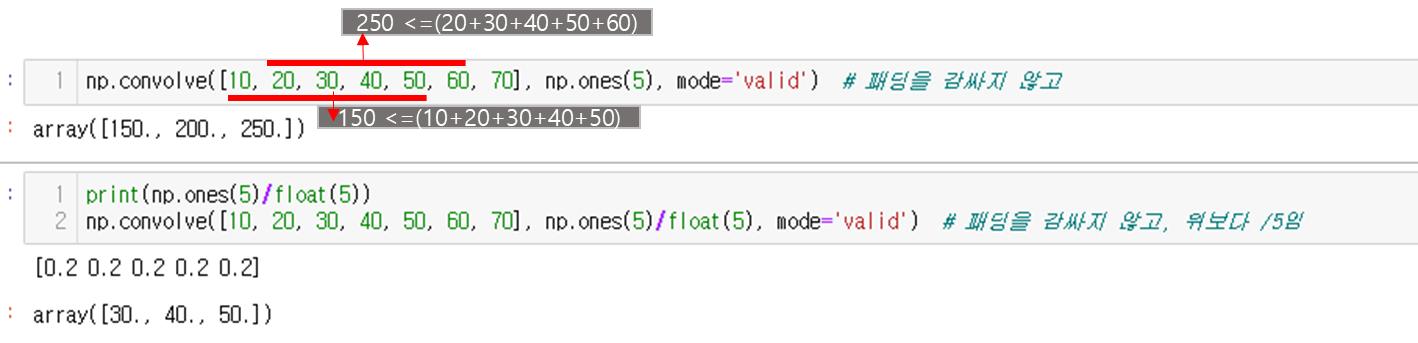

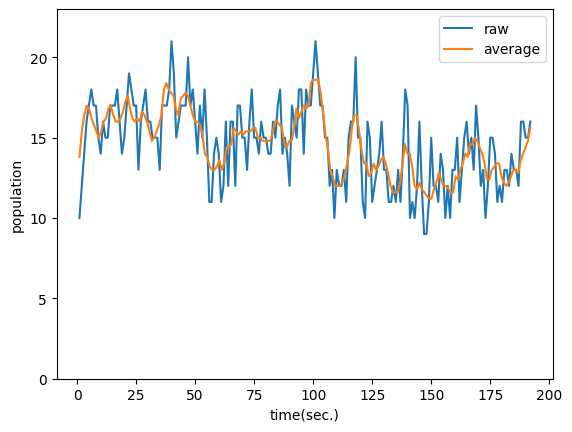

In [94]:
## 이동평균선을 이용한 노이즈 제거
# https://wikidocs.net/4373

import numpy as np
def moving_average(x, y):
    y_conv = np.convolve(y, np.ones(5)/float(5), mode='valid')
    x_dat = np.linspace(np.min(x), np.max(x), np.size(y_conv))
    return x_dat, y_conv

plt.plot(x, y, label="raw")
ma_x, ma_y = moving_average(x, y)
plt.plot(ma_x,ma_y, label="average")
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,max(y)+2)
plt.legend()
plt.show()

In [77]:
import pandas as pd
df=pd.DataFrame({'time':x,'2022-3-5':y})
df

,time,2022-3-5
0,1,10
1,2,12
2,3,14
3,4,16
4,5,17
...,...,...
187,188,16
188,189,16
189,190,15
190,191,15


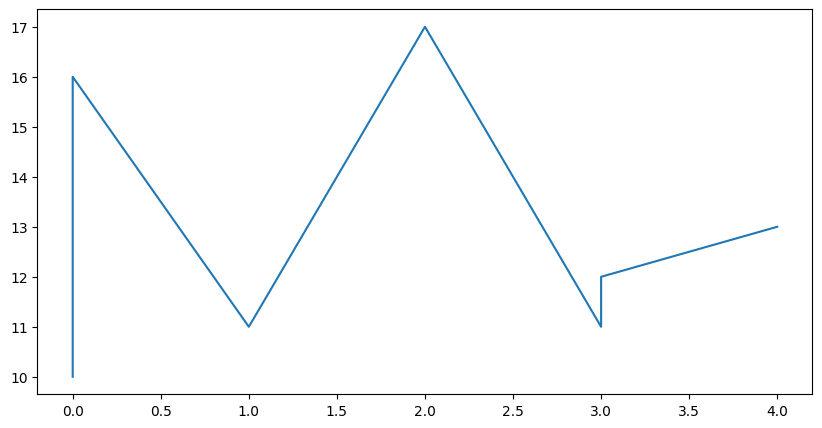

In [129]:
## 1초단위로 사람인원수를 그리고자함.
xSec,ySec=[],[]

for cnt,(x,y) in enumerate(data):
    
    if cnt%30==0:
        xSec.append(int(cnt/39))
        ySec.append(y)
        
plt.figure(figsize=(10,5))
plt.plot(xSec,ySec)

#print(cnt,int(cnt/30))
    